Step 1 :Import all libraries

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


Read the data set

In [6]:
import pandas as pd

file_path = 'train.csv'
train_data = pd.read_csv(file_path, nrows=10000)
train_data.head() 
 

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
train_data = train_data.drop(columns=['Id'])

Check the null values

In [8]:
nullvalues = train_data.isna().sum()
nullvalues.sort_values(ascending=False)

ResourceType          9992
ActionGrouped         9941
ActionGranular        9941
ThreatFamily          9923
EmailClusterId        9881
AntispamDirection     9823
Roles                 9789
SuspicionLevel        8462
LastVerdict           7600
MitreTechniques       5799
IncidentGrade           53
ApplicationId            0
FileName                 0
RegistryValueData        0
ApplicationName          0
RegistryValueName        0
OAuthApplicationId       0
Unnamed: 0               0
FolderPath               0
ResourceIdName           0
RegistryKey              0
OSVersion                0
CountryCode              0
State                    0
OSFamily                 0
DeviceName               0
NetworkMessageId         0
EvidenceRole             0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
EntityType               0
DeviceId                 0
OrgId                    0
S

Drop the null value column

In [9]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
train_data = train_data.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(train_data.columns)


Remaining columns after dropping:
Index(['Unnamed: 0', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')


Delete the null rows

In [10]:
train_data = train_data.dropna()

Drop the timestamp column

In [11]:
import pandas as pd

# Create a DataFrame
train_data['Timestamp'] = pd.DataFrame(train_data['Timestamp'])

# Convert the 'Timestamp' column to datetime format
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

# Separate year, month, and day into new columns
train_data['Year'] = train_data['Timestamp'].dt.year
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['Day'] = train_data['Timestamp'].dt.day

# Display the DataFrame
train_data = train_data.drop(columns=['Timestamp'])

resample method used by undersampling method

In [12]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = train_data['IncidentGrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = train_data[train_data['IncidentGrade'] == class_value]
    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Verify the new class distribution
print(df_balanced['IncidentGrade'].value_counts())
train_data = df_balanced

IncidentGrade
BenignPositive    2110
TruePositive      2110
FalsePositive     2110
Name: count, dtype: int64


In [13]:
train_data.shape

(6330, 37)

In [14]:
train_data = train_data.astype('category')

Encoded the categorical variable

This  data is numerical columns i have converted into the categorical column

In [15]:
train_data['CountryCode'].value_counts

<bound method IndexOpsMixin.value_counts of 9225    242
697     242
7060    242
7301    242
6385    242
       ... 
9982    242
9989    242
9995    242
9997    242
9998    242
Name: CountryCode, Length: 6330, dtype: category
Categories (62, int64): [0, 1, 2, 3, ..., 70, 75, 140, 242]>

In [16]:
train_data.columns

Index(['Unnamed: 0', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day'],
      dtype='object')

In [17]:
def reduce_rare_categories(df, column, threshold):
    # Get the top N most frequent categories
    top_categories = df[column].value_counts().nlargest(threshold).index
    
    # If the column is categorical, add the 'others' category only if it's not already present
    if df[column].dtype.name == 'category':
        if 'others' not in df[column].cat.categories:
            df[column] = df[column].cat.add_categories('others')
    
    # Replace categories not in the top N with 'others'
    return df[column].where(df[column].isin(top_categories), 'others')

filter_columns = ['CountryCode', 'State', 'City', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
                  'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',  # Fixed comma
                  'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId','FolderPath','ResourceIdName','Day',
                  'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'FileName']

for col in filter_columns:
    train_data[col] = reduce_rare_categories(train_data, col, threshold=20)

# Now df contains 'others' for rare categories
train_data.head()


,Unnamed: 0,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
9225,9225,others,others,others,others,others,CommandAndControl,BenignPositive,Ip,Related,...,117668,3586,5,66,242,1445,10630,2024,5,others
697,697,others,others,others,0,0,InitialAccess,BenignPositive,CloudLogonSession,Related,...,117668,3586,5,66,242,1445,10630,2024,6,13
7060,7060,3,others,others,2,2,CommandAndControl,BenignPositive,Url,Related,...,117668,3586,5,66,242,1445,10630,2024,6,14
7301,7301,others,others,others,others,others,CommandAndControl,BenignPositive,Ip,Related,...,117668,3586,5,66,242,1445,10630,2024,5,others
6385,6385,others,others,others,5,others,SuspiciousActivity,BenignPositive,Ip,Related,...,117668,3586,5,66,242,1445,10630,2024,6,7


In [18]:
categorical_columns = train_data.columns

In [19]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to strings to ensure uniform type
for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)

# Now apply LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data.head()  # Check if categorical columns have been encoded


,Unnamed: 0,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
9225,5773,20,20,20,20,20,1,0,6,1,...,2,5,2,3,11,5,2,0,1,20
697,4216,20,20,20,0,0,9,0,4,1,...,2,5,2,3,11,5,2,0,2,3
7060,4281,11,20,20,8,11,1,0,17,1,...,2,5,2,3,11,5,2,0,2,4
7301,4446,20,20,20,20,20,1,0,6,1,...,2,5,2,3,11,5,2,0,1,20
6385,3821,20,20,20,15,20,15,0,6,1,...,2,5,2,3,11,5,2,0,2,17


In [20]:
train_data.nunique()

Unnamed: 0            6330
OrgId                   21
IncidentId              21
AlertId                 21
DetectorId              21
AlertTitle              21
Category                17
IncidentGrade            3
EntityType              19
EvidenceRole             2
DeviceId                21
Sha256                  21
IpAddress               21
Url                     21
AccountSid              21
AccountUpn              21
AccountObjectId         21
AccountName             21
DeviceName              21
NetworkMessageId        21
RegistryKey              8
RegistryValueName        4
RegistryValueData        3
ApplicationId           17
ApplicationName         19
OAuthApplicationId       3
FileName                21
FolderPath              21
ResourceIdName           8
OSFamily                 3
OSVersion                4
CountryCode             21
State                   21
City                    21
Year                     1
Month                    3
Day                     21
d

Test train split up

In [21]:
# Update with the actual column name for your target variable
target_column = 'IncidentGrade'  # Example: Replace 'class' with the actual name of the target column

# Split features and target variable
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

# Train-Validation split (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (5064, 36)
Validation set shape: (1266, 36)


In [22]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


              precision    recall  f1-score   support

           0       0.63      0.66      0.64       422
           1       0.66      0.71      0.68       422
           2       0.76      0.67      0.71       422

    accuracy                           0.68      1266
   macro avg       0.68      0.68      0.68      1266
weighted avg       0.68      0.68      0.68      1266

Macro F1 Score: 0.6793684860186927
Precision: 0.6825578231292516
Recall: 0.6785150078988941


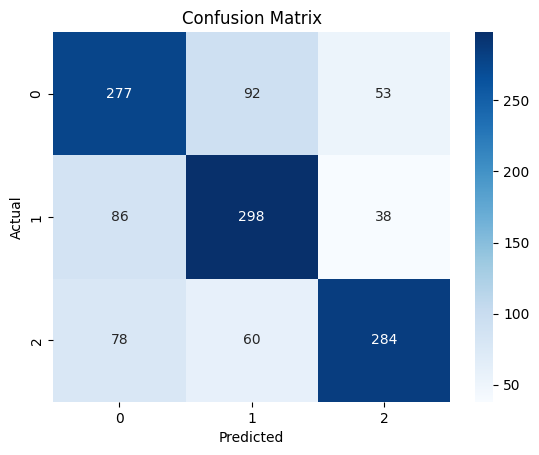

In [23]:
# Confusion matrix to visualize misclassifications
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Grid search for Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_rf.predict(X_val)

# Evaluate the tuned model
print(classification_report(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       0.62      0.81      0.70       422
           1       0.73      0.66      0.69       422
           2       0.83      0.66      0.74       422

    accuracy                           0.71      1266
   macro avg       0.73      0.71      0.71      1266
weighted avg       0.73      0.71      0.71      1266



In [25]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'final_model.pkl')

# Load the model later when needed
# model = joblib.load('final_model.pkl')


['final_model.pkl']